In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout,GRU
from keras import optimizers

seed = 1234
np.random.seed(seed)
plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Import Data

In [2]:
dataraw = pd.read_csv('/content/processed_hourly_data.csv',index_col=0)
dataraw


,Datetime,SP500,DOW30,EuroStoxx50,NASDAQ,CrudeOil,SSE,Gold,VIX,Nikkei225,...,total_volume_quote,total_volume_base,total_volume_total,volume,high,low,open,close,volumefrom,volumeto
667,2022-02-28 10:00:00-05:00,4360.924805,33767.826172,3915.540039,13709.718262,95.510002,3457.902100,1910.400024,30.559999,26522.330078,...,4.074564e+08,8.501518e+09,8.908974e+09,100298.59,40917.71,39652.14,39849.29,40845.79,7495.87,3.026021e+08
668,2022-02-28 11:00:00-05:00,4369.179932,33849.894531,3933.479980,13734.242676,95.440002,3457.902100,1894.500000,28.690001,26522.330078,...,2.951618e+08,7.640820e+09,7.935982e+09,71235.25,41338.07,40736.36,40845.79,41021.81,5232.77,2.148198e+08
669,2022-02-28 12:00:00-05:00,4349.699951,33720.744141,3933.479980,13666.251465,96.209999,3457.902100,1900.900024,30.639999,26522.330078,...,2.022620e+08,6.928419e+09,7.130681e+09,40264.68,41320.14,40768.17,41021.81,41319.61,2842.60,1.165622e+08
670,2022-02-28 13:00:00-05:00,4332.359863,33589.654297,3933.479980,13607.824707,96.459999,3457.902100,1900.699951,30.820000,26522.330078,...,1.731512e+08,6.676633e+09,6.849784e+09,34319.26,41427.99,41082.37,41319.61,41217.44,2455.10,1.013162e+08
671,2022-02-28 14:00:00-05:00,4331.229980,33588.664062,3933.479980,13605.203125,95.680000,3457.902100,1908.300049,31.920000,26522.330078,...,1.655895e+08,5.810772e+09,5.976362e+09,28324.04,41377.67,41057.84,41217.44,41357.77,2007.00,8.271987e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18064,2024-02-20 11:00:00-05:00,4969.645020,38550.503906,4763.259766,15567.405273,78.860001,2920.561279,2038.500000,15.580000,38409.390625,...,1.727552e+09,1.730651e+09,3.458204e+09,33578.32,51795.47,51369.97,51693.91,51396.39,1748.02,9.020375e+07
18065,2024-02-20 12:00:00-05:00,4961.074951,38504.060547,4763.259766,15532.355957,79.169998,2920.561279,2040.000000,15.640000,38409.390625,...,3.983693e+08,3.721585e+09,4.119954e+09,44409.48,51397.71,50766.77,51396.39,51321.90,3702.71,1.892794e+08
18066,2024-02-20 13:00:00-05:00,4965.669922,38540.031250,4763.259766,15555.064941,79.230003,2920.561279,2038.599976,15.500000,38409.390625,...,1.272772e+08,1.996156e+09,2.123433e+09,22321.76,51536.57,51236.14,51321.90,51504.22,1518.03,7.796947e+07
18067,2024-02-20 14:00:00-05:00,4973.215088,38575.441406,4763.259766,15592.756348,78.269997,2920.561279,2036.500000,15.330000,38409.390625,...,2.904525e+08,2.182250e+09,2.472703e+09,28053.63,52111.16,51439.74,51504.22,52095.65,1791.37,9.274488e+07


In [3]:
dataraw.describe()

,SP500,DOW30,EuroStoxx50,NASDAQ,CrudeOil,SSE,Gold,VIX,Nikkei225,FTSE100,...,total_volume_quote,total_volume_base,total_volume_total,volume,high,low,open,close,volumefrom,volumeto
count,12447.000000,12447.000000,12447.000000,12447.000000,12447.000000,12447.000000,12447.000000,12447.000000,12447.000000,12447.000000,...,1.244700e+04,1.244700e+04,1.244700e+04,12447.000000,12447.000000,12447.000000,12447.000000,12447.000000,12447.000000,1.244700e+04
mean,4214.049562,33711.509704,4043.392409,12662.403729,85.159580,3154.605993,1895.637600,20.554999,29567.916085,7497.251071,...,5.264224e+08,1.300558e+09,1.826980e+09,39825.064563,28785.140930,28566.220911,28677.202204,28677.847787,1876.444502,5.050616e+07
std,317.722872,1926.967706,354.393755,1398.175680,13.189159,139.623206,113.188041,5.899774,3047.316493,232.388585,...,1.612560e+09,2.057852e+09,2.627757e+09,33867.375756,8772.621924,8704.497433,8739.239243,8741.097988,1887.964970,4.994339e+07
min,3571.894897,28845.505859,3266.370117,10216.044434,64.639999,2675.230347,1620.300049,11.840000,24706.759766,6736.209961,...,6.988498e+06,6.620872e+07,8.010350e+07,3997.080000,15746.250000,15480.690000,15631.360000,15631.360000,117.340000,3.312832e+06
25%,3966.887512,32795.655273,3750.065063,11454.706055,75.269997,3062.460815,1816.900024,14.890000,27175.099609,7373.599854,...,3.875339e+07,3.563843e+08,4.495580e+08,17918.255000,21507.115000,21314.600000,21421.155000,21418.700000,766.420000,2.184858e+07
50%,4154.709961,33678.064453,4144.339844,12496.901855,80.849998,3186.755493,1928.000000,19.860001,28122.970703,7505.509766,...,8.014428e+07,6.737433e+08,1.022762e+09,31519.490000,27375.060000,27190.130000,27274.420000,27269.020000,1338.240000,3.632766e+07
75%,4451.985107,34500.236328,4320.025146,13742.898926,91.199997,3262.858276,1981.300049,24.620001,32390.230469,7639.339844,...,3.570877e+08,1.284502e+09,2.686272e+09,50422.695000,34675.710000,34438.760000,34544.190000,34544.190000,2287.955000,6.159734e+07
max,5042.459961,38872.925781,4776.520020,16046.496094,128.389999,3490.994995,2136.500000,37.029999,38837.648438,8022.049805,...,1.472181e+11,1.099648e+11,1.519730e+11,629749.040000,52985.950000,52316.660000,52841.210000,52841.210000,25938.360000,9.840663e+08


#feature selection

 Count row of data:  12447


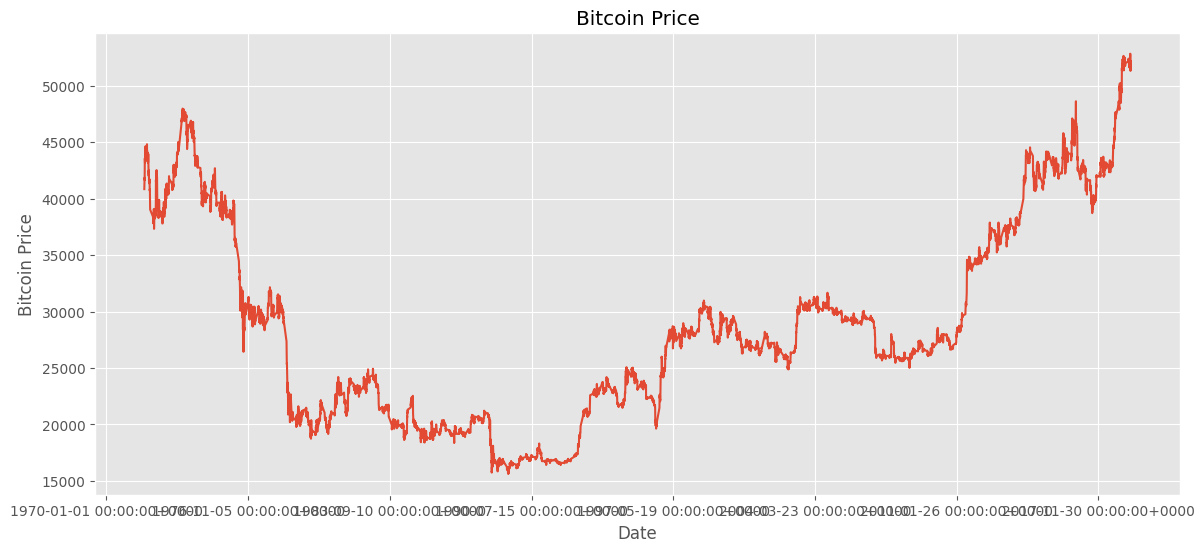

In [4]:
# use feature 'Date' & 'Close'
dataset = pd.DataFrame(dataraw['close'])
print(' Count row of data: ',len(dataset))

fig = plt.figure(figsize=(14, 6))
plt.plot(dataset)
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S%z"))
plt.title('Bitcoin Price')
plt.show()

#Preprocessing Data
#Normalization Min-Max

In [5]:
#Min-Max Normalization
dataset_norm = dataset.copy()
dataset[['close']]
scaler = MinMaxScaler()
dataset_norm['close'] = scaler.fit_transform(dataset[['close']])
dataset_norm

,close
667,0.677628
668,0.682358
669,0.690362
670,0.687616
671,0.691387
...,...
18064,0.961171
18065,0.959169
18066,0.964069
18067,0.979963


#Normalized graph

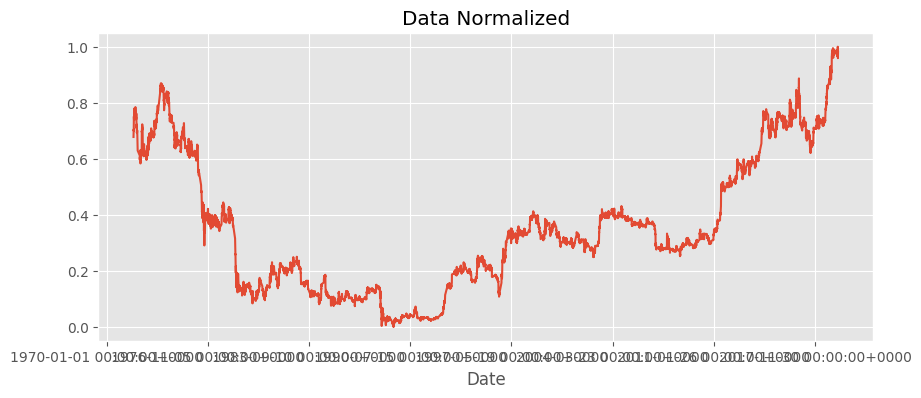

In [6]:
fig = plt.figure(figsize=(10, 4))
plt.plot(dataset_norm)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S%z"))
plt.title('Data Normalized')
plt.show()

#data partition

In [7]:
# Partition data into data train, val & test
totaldata = dataset.values
totaldatatrain = int(len(totaldata)*0.7)
totaldataval = int(len(totaldata)*0.1)
totaldatatest = int(len(totaldata)*0.2)

# Store data into each partition
training_set = dataset_norm[0:totaldatatrain]
val_set=dataset_norm[totaldatatrain:totaldatatrain+totaldataval]
test_set = dataset_norm[totaldatatrain+totaldataval:]

#training data graph

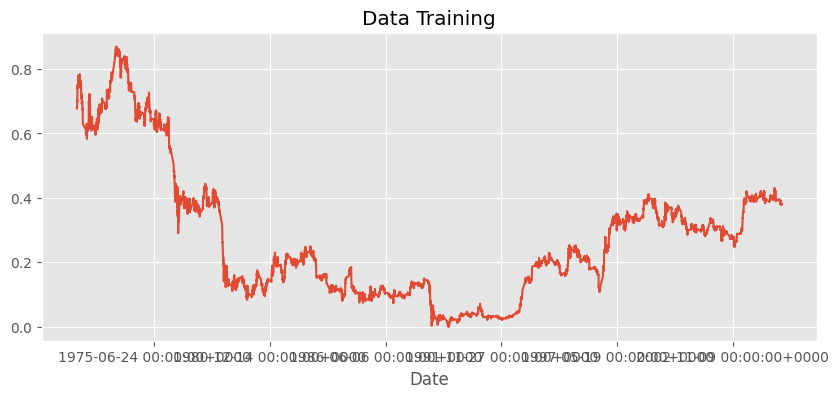

In [8]:
# graph of data training
fig = plt.figure(figsize=(10, 4))
plt.plot(training_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S%z"))
plt.title('Data Training')
plt.show()

Data Validation Graph

,close
12841,0.381015
12842,0.381395
12843,0.382491
12844,0.387806
12845,0.386565
...,...
14554,0.288333
14555,0.290115
14556,0.290299
14557,0.288553


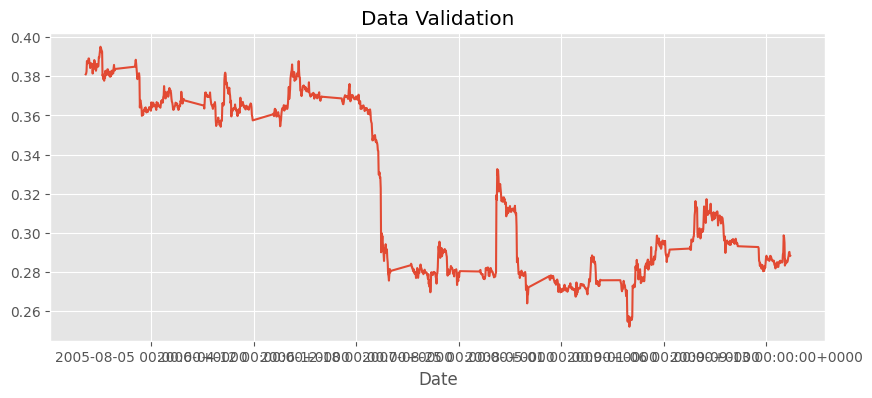

In [9]:
# graph of data validation
fig = plt.figure(figsize=(10, 4))
plt.plot(val_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S%z"))
plt.title('Data Validation')
val_set

Data Test Graph

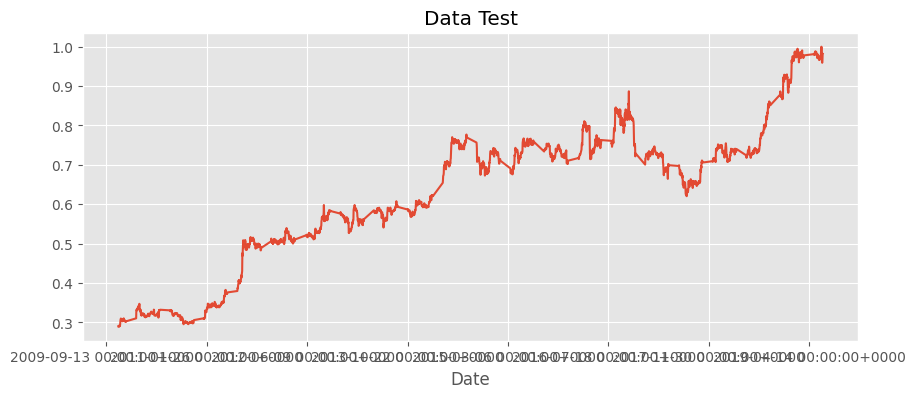

,close
14559,0.290140
14560,0.290154
14561,0.290907
14562,0.290504
14563,0.289120
...,...
18064,0.961171
18065,0.959169
18066,0.964069
18067,0.979963


In [10]:
# graph of data test
fig = plt.figure(figsize=(10, 4))
plt.plot(test_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S%z"))
plt.title('Data Test')
plt.show()
test_set

#Sliding Windows

In [11]:
# Initiaton value of lag
lag = 2
# sliding windows function
def create_sliding_windows(data,len_data,lag):
    x=[]
    y=[]
    for i in range(lag,len_data):
        x.append(data[i-lag:i,0])
        y.append(data[i,0])
    return np.array(x),np.array(y)

# Formating data into array for create sliding windows
array_training_set = np.array(training_set)
array_val_set = np.array(val_set)
array_test_set = np.array(test_set)

# Create sliding windows into training data
x_train, y_train = create_sliding_windows(array_training_set,len(array_training_set), lag)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
# Create sliding windows into validation data
x_val,y_val = create_sliding_windows(array_val_set,len(array_val_set),lag)
x_val = np.reshape(x_val, (x_val.shape[0],x_val.shape[1],1))
# Create sliding windows into test data
x_test,y_test = create_sliding_windows(array_test_set,len(array_test_set),lag)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

#Model GRU

In [13]:
!git clone https://github.com/lessw2020/Ranger-Deep-Learning-Optimizer.git



Cloning into 'Ranger-Deep-Learning-Optimizer'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 148 (delta 44), reused 30 (delta 30), pack-reused 89
Receiving objects: 100% (148/148), 186.77 KiB | 2.36 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [17]:
import sys
sys.path.append("/content/Ranger-Deep-Learning-Optimizer/ranger")

from ranger import Ranger



In [32]:
from keras.models import Sequential
from keras.layers import GRU, Dropout, Dense
from ranger import Ranger

# Hyperparameters
learning_rate = 0.0001
hidden_unit = 64
batch_size = 256
epoch = 100

# Architecture Gated Recurrent Unit
regressorGRU = Sequential()

# First GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=True, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=False, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Output layer
regressorGRU.add(Dense(units=1))

# Compile the Gated Recurrent Unit with Ranger optimizer
regressorGRU.compile(optimizer=Ranger(), loss='mean_squared_error')

# Fitting ke data training dan data validation
pred = regressorGRU.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs=epoch)


TypeError: Ranger.__init__() missing 1 required positional argument: 'params'

#real

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dropout, Dense
from keras.optimizers import Adam

# Hyperparameters
learning_rate = 0.0001
hidden_unit = 64
batch_size = 256
epoch = 100

# Architecture Gated Recurrent Unit
regressorGRU = Sequential()

# First GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=True, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=False, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Output layer
regressorGRU.add(Dense(units=1))

# Compiling the Gated Recurrent Unit
regressorGRU.compile(optimizer=Adam(lr=learning_rate), loss='mean_squared_error')

# Fitting ke data training dan data validation
pred = regressorGRU.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs=epoch)


# Graph Training loss & Validation Loss

In [ ]:
# Graph model loss (train loss & val loss)
fig = plt.figure(figsize=(10, 4))
plt.plot(pred.history['loss'], label='train loss')
plt.plot(pred.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

#Training Loss & Validation Loss Table

In [ ]:
# Tabel value of training loss & validation loss
learningrate_parameter = learning_rate
train_loss=pred.history['loss'][-1]
validation_loss=pred.history['val_loss'][-1]
learningrate_parameter=pd.DataFrame(data=[[learningrate_parameter, train_loss, validation_loss]],
                                    columns=['Learning Rate', 'Training Loss', 'Validation Loss'])
learningrate_parameter.set_index('Learning Rate')

#Implementation Model into Data Test

In [ ]:
# Implementation model into data test
y_pred_test = regressorGRU.predict(x_test)

# Invert normalization min-max
y_pred_invert_norm = scaler.inverse_transform(y_pred_test)

Comparison Data Test with Prediction Results

In [ ]:
# Comparison data test with data prediction
datacompare = pd.DataFrame()
datatest=np.array(dataset['close'][totaldatatrain+totaldataval+lag:])
datapred= y_pred_invert_norm

datacompare['Data Test'] = datatest
datacompare['Prediction Results'] = datapred
datacompare

Prediction Results Evaluation

In [ ]:
# Calculatre value of Root Mean Square Error
def rmse(datatest, datapred):
    return np.round(np.sqrt(np.mean((datapred - datatest) ** 2)), 4)
print('Result Root Mean Square Error Prediction Model :',rmse(datatest, datapred))

def mape(datatest, datapred):
    return np.round(np.mean(np.abs((datatest - datapred) / datatest) * 100), 4)

print('Result Mean Absolute Percentage Error Prediction Model : ', mape(datatest, datapred), '%')


#graph

In [ ]:
# Create graph data test and prediction result
plt.figure(num=None, figsize=(10, 4), dpi=80,facecolor='w', edgecolor='k')
plt.title('Graph Comparison Data Actual and Data Prediction')
plt.plot(datacompare['Data Test'], color='red',label='Data Test')
plt.plot(datacompare['Prediction Results'], color='blue',label='Prediction Results')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()